In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [33]:

# def merge_csv_files(directory):
#     # List all CSV files in the directory
#     csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

#     # Initialize an empty DataFrame to store the merged data
#     merged_df = pd.DataFrame()
#     count=1
#     # Flag to indicate whether to include headers
#     include_headers = True
#     flag=0 if include_headers else None
#     # Iterate over each CSV file and merge into the DataFrame
#     for file in csv_files:
#         file_path = os.path.join(directory, file)
#         # Skip headers for all files except the first one
#         df = pd.read_csv(file_path, header=flag)
#         df=df[df['area_code'].str.contains('VIC', na=False) | df['area_code'].isnull()]
#         merged_df = pd.concat([merged_df, df], ignore_index=True)
#         include_headers = False  # Headers only for the first file
#         if count%5==0:
#             print(count/len(csv_files))
#         count+=1

#     return merged_df

# # Specify the directory containing CSV files
# csv_directory = './weather/obs/'

# # Merge CSV files and store the merged DataFrame
# obs_df = merge_csv_files(csv_directory)
# output_file_path = 'merged_weather_obs.pkl'  # Adjust the filename and path as needed
# obs_df.to_pickle(output_file_path)


0.004562043795620438
0.009124087591240875
0.013686131386861315
0.01824817518248175
0.02281021897810219
0.02737226277372263
0.03193430656934307
0.0364963503649635
0.04105839416058394
0.04562043795620438
0.05018248175182482
0.05474452554744526
0.05930656934306569
0.06386861313868614
0.06843065693430657
0.072992700729927
0.07755474452554745
0.08211678832116788
0.08667883211678833
0.09124087591240876
0.09580291970802919
0.10036496350364964
0.10492700729927007
0.10948905109489052
0.11405109489051095
0.11861313868613138
0.12317518248175183
0.12773722627737227
0.1322992700729927
0.13686131386861314
0.14142335766423358
0.145985401459854
0.15054744525547445
0.1551094890510949
0.15967153284671534
0.16423357664233576
0.1687956204379562
0.17335766423357665
0.17791970802919707
0.18248175182481752
0.18704379562043796
0.19160583941605838
0.19616788321167883
0.20072992700729927
0.20529197080291972
0.20985401459854014
0.21441605839416059
0.21897810218978103
0.22354014598540145
0.2281021897810219
0.2326

In [2]:
obs_df_=pd.read_pickle("./merged_weather_obs.pkl")
station_df_1=pd.read_csv("./StationData_1.csv")
station_df_2=pd.read_csv("./StationData_2.csv")
station_df_3=pd.read_csv("./StationData_3.csv")
station_df = pd.concat([station_df_2, station_df_2, station_df_3], ignore_index=True)
station_df.drop_duplicates(subset=["WMO_NUM","station_number","LATITUDE","LONGITUDE"],keep='first', inplace=True)
obs_df=obs_df_.merge(station_df[["station_number","REGION"]], on='station_number', how='left')
obs_df.loc[~(obs_df["area_code"].isna()),"REGION"]=obs_df.loc[~(obs_df["area_code"].isna()),"area_code"].str[:3]
obs_df.rename(columns={'REGION': 'region'}, inplace=True)

In [3]:
(obs_df.loc[~(obs_df["area_code"].isna()),"region"]==obs_df_.loc[~(obs_df["area_code"].isna()),"area_code"].str[:3]).all()

True

In [4]:
obs_df_VIC=obs_df[obs_df["region"]=="VIC"]

In [5]:
obs_df_VIC.loc[:,"valid_start"]=pd.to_datetime(obs_df_VIC['valid_start'], unit='s')
obs_df_VIC.loc[:,"valid_end"]=pd.to_datetime(obs_df_VIC['valid_end'], unit='s')
obs_df_VIC.loc[:,"qc_valid_start"]=pd.to_datetime(obs_df_VIC['qc_valid_start'], unit='s')
obs_df_VIC.loc[:,"qc_valid_end"]=pd.to_datetime(obs_df_VIC['qc_valid_end'], unit='s')

In [7]:
obs_df_VIC.parameter.value_counts()

parameter
AIR_TEMP        1303472
AIR_TEMP_MAX    1303472
AIR_TEMP_MIN    1303472
PRCP            1288214
MaxWindMag       696098
WindMag          696046
MaxT             675513
MinT             675513
T                671462
WindDir          656998
Precip           654232
Td               649789
RH               649789
Name: count, dtype: int64

In [9]:
obs_df_VIC=obs_df_VIC[obs_df_VIC.parameter.isin(["AIR_TEMP","AIR_TEMP_MAX","AIR_TEMP_MIN","PRCP","MaxT","MinT","T","Precip"])]
replacement_mapping = {
    'MaxT': 'AIR_TEMP_MAX',
    'MinT': 'AIR_TEMP_MIN',
    'T': 'AIR_TEMP',
    'Precip': 'PRCP'
}

obs_df_VIC['parameter'] = obs_df_VIC['parameter'].replace(replacement_mapping)
df_obs=pd.DataFrame((obs_df_VIC.groupby(["valid_start","parameter"]).agg({"value":"mean"}))).reset_index()


In [41]:
df_obs.head()

,valid_start,parameter,value
0,2015-04-30 14:00:00,AIR_TEMP,9.085135
1,2015-04-30 14:00:00,AIR_TEMP_MAX,9.381081
2,2015-04-30 14:00:00,AIR_TEMP_MIN,8.331081
3,2015-04-30 14:00:00,PRCP,0.000000
4,2015-04-30 15:00:00,AIR_TEMP,8.638356


In [47]:
obs_df_VIC[obs_df_VIC.valid_start=="2015-05-30 21:00:00"].parameter.value_counts()

parameter
AIR_TEMP        74
AIR_TEMP_MAX    74
AIR_TEMP_MIN    74
PRCP            73
Name: count, dtype: int64

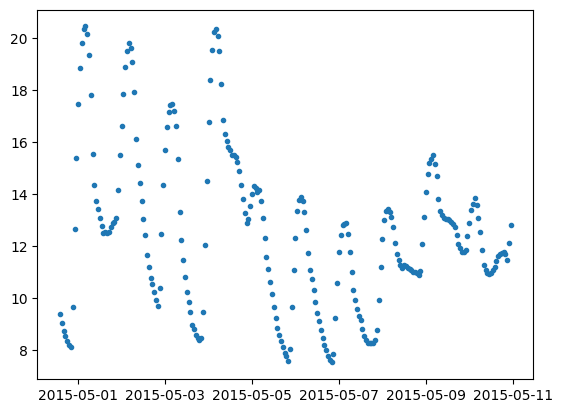

In [39]:
plt.plot(df_obs.loc[df_obs.parameter=="AIR_TEMP_MAX","valid_start"][:250],df_obs.loc[df_obs.parameter=="AIR_TEMP_MAX","value"][:250],".")

In [70]:
obs_df['region'] = obs_df['station_number'].map(station_df.drop_duplicates('station_number').set_index('station_number')['REGION']).fillna(obs_df['region'])

In [73]:
obs_df[~(obs_df["area_code"].isna())]

,station_number,area_code,parameter,valid_start,valid_end,value,unit,statistic,level,qc_valid_minutes,qc_valid_start,qc_valid_end,instantaneous,qc_valid_minutes_start,qc_valid_minutes_end,region
25,72160,VIC_PT084,MaxT,1493596800,1493600400,14.8,Celsius,max,SFC,60.0,1.493597e+09,1.493600e+09,NaN,NaN,NaN,NSW
26,76031,VIC_PT119,MaxT,1493596800,1493600400,19.2,Celsius,max,SFC,60.0,1.493597e+09,1.493600e+09,NaN,NaN,NaN,VIC
27,76064,VIC_PT074,MaxT,1493596800,1493600400,18.5,Celsius,max,SFC,60.0,1.493597e+09,1.493600e+09,NaN,NaN,NaN,VIC
28,77010,VIC_PT093,MaxT,1493596800,1493600400,19.4,Celsius,max,SFC,60.0,1.493597e+09,1.493600e+09,NaN,NaN,NaN,VIC
29,77094,VIC_PT127,MaxT,1493596800,1493600400,17.8,Celsius,max,SFC,60.0,1.493597e+09,1.493600e+09,NaN,NaN,NaN,VIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15990317,90194,VIC_PT159,PRCP,1493542800,1493543400,0.0,mm,sum,SFC,60.0,NaN,NaN,False,1.493543e+09,1.493546e+09,VIC
15990318,90194,VIC_PT159,PRCP,1493546400,1493547000,0.0,mm,sum,SFC,60.0,NaN,NaN,False,1.493546e+09,1.493550e+09,VIC
15990319,90194,VIC_PT159,PRCP,1493550000,1493550600,0.0,mm,sum,SFC,60.0,NaN,NaN,False,1.493550e+09,1.493554e+09,VIC
15990320,90194,VIC_PT159,PRCP,1493553600,1493554200,0.0,mm,sum,SFC,60.0,NaN,NaN,False,1.493554e+09,1.493557e+09,VIC


In [51]:
obs_df[(obs_df["area_code"].isna())].station_number.value_counts()

station_number
91245    148999
90182    148229
33210    147946
35129    147057
86320    146532
          ...  
9214      26225
33208     24192
32182     24015
14072     20361
46136     11676
Name: count, Length: 71, dtype: int64

In [32]:
import os

def process_csv_files(directory):
    # List all CSV files in the directory
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    flag=1
    # Iterate over each CSV file
    for file in csv_files:
        file_path = os.path.join(directory, file)
        new_lines = []

        # Open the CSV file and replace ';' with ','
        with open(file_path, 'r') as f:
            for line in f:
                new_line = line.replace(';', ',')
                new_lines.append(new_line)

        # Open the CSV file again and replace ',' with '.'
        with open(file_path, 'w') as f:
            for line in new_lines:
                f.write(line.replace(',', '.'))
        if flag%5==0:
            print(flag/len(csv_files))
        flag+=1

# Specify the directory containing CSV files
csv_directory = './weather/obs/2016/'

# Process CSV files in the directory
process_csv_files(csv_directory)

0.01366120218579235
0.0273224043715847
0.040983606557377046
0.0546448087431694
0.06830601092896176
0.08196721311475409
0.09562841530054644
0.1092896174863388
0.12295081967213115
0.1366120218579235
0.15027322404371585
0.16393442622950818
0.17759562841530055
0.1912568306010929
0.20491803278688525
0.2185792349726776
0.23224043715846995
0.2459016393442623
0.25956284153005466
0.273224043715847
0.28688524590163933
0.3005464480874317
0.31420765027322406
0.32786885245901637
0.34153005464480873
0.3551912568306011
0.36885245901639346
0.3825136612021858
0.39617486338797814
0.4098360655737705
0.42349726775956287
0.4371584699453552
0.45081967213114754
0.4644808743169399
0.4781420765027322
0.4918032786885246
0.505464480874317
0.5191256830601093
0.5327868852459017
0.546448087431694
0.5601092896174863
0.5737704918032787
0.587431693989071
0.6010928961748634
0.6147540983606558
0.6284153005464481
0.6420765027322405
0.6557377049180327
0.6693989071038251
0.6830601092896175
0.6967213114754098
0.710382513661